In [1]:
import os
import glob
import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision import transforms, utils
from torchvision.io import read_image
from torchvision.io.image import ImageReadMode
import torch.nn.functional as F

In [46]:
class SegPC2021Dataset(Dataset):
    def __init__(self,
                 mode, # 'tr'-> train, 'vl' -> validation, 'te' -> test
                 input_size=224,
                 scale=2.5,
                 data_dir=None, 
                 dataset_dir=None,
                 one_hot=True,
                 force_rebuild=False,
                 img_transform=None, 
                 msk_transform=None):
        # pre-set variables
        self.data_dir = data_dir if data_dir else "/path/to/datasets/segpc/np"
        self.dataset_dir = dataset_dir if dataset_dir else "/path/to/datasets/segpc/TCIA_SegPC_dataset/"
        self.mode = mode
        # input parameters
        self.img_transform = img_transform
        self.msk_transform = msk_transform
        self.input_size = input_size
        self.scale = scale
        self.one_hot = one_hot
        
        # loading data
        self.load_dataset(force_rebuild=force_rebuild)
    

    def load_dataset(self, force_rebuild):
        INPUT_SIZE = self.input_size
        ADD = self.data_dir
        
#         build_segpc_dataset(
#             input_size = self.input_size,
#             scale = self.scale,
#             data_dir = self.data_dir,
#             dataset_dir = self.dataset_dir,
#             mode = self.mode,
#             force_rebuild = force_rebuild,
#         )
        
        print(f'loading X_{self.mode}...')
        self.X = np.load(f'{ADD}/cyts_{self.mode}_{self.input_size}x{self.input_size}_s{self.scale}_X.npy')
        print(f'loading Y_{self.mode}...')
        self.Y = np.load(f'{ADD}/cyts_{self.mode}_{self.input_size}x{self.input_size}_s{self.scale}_Y.npy')
        print('finished.')


    def __len__(self):
        return len(self.X)


    def __getitem__(self, idx):
        img = self.X[idx]
        msk = self.Y[idx]
        msk = np.where(msk<0.5, 0, 1)

        if self.img_transform:
            img = self.img_transform(img)
            img = (img - img.min())/(img.max() - img.min())
        if self.msk_transform:
            msk = self.msk_transform(msk)
            msk = (msk - msk.min())/(msk.max() - msk.min())
            
        if self.one_hot:
            msk = F.one_hot(torch.squeeze(msk).to(torch.int64))
            msk = torch.moveaxis(msk, -1, 0).to(torch.float)
            
        sample = {'image': img, 'mask': msk, 'id': idx}
        return sample

loading X_tr...
loading Y_tr...
finished.
loading X_vl...
loading Y_vl...
finished.
loading X_te...
loading Y_te...
finished.
Training torch.Size([8, 2, 224, 224])


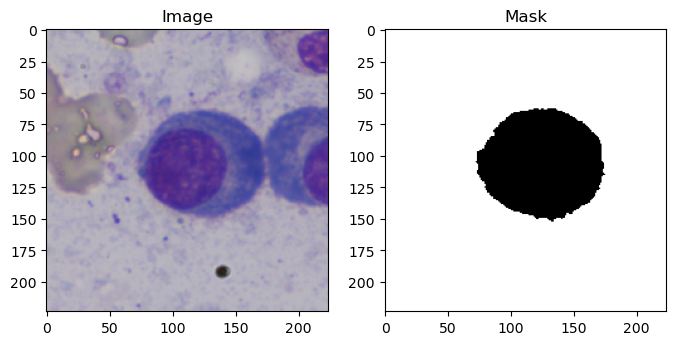

Validation


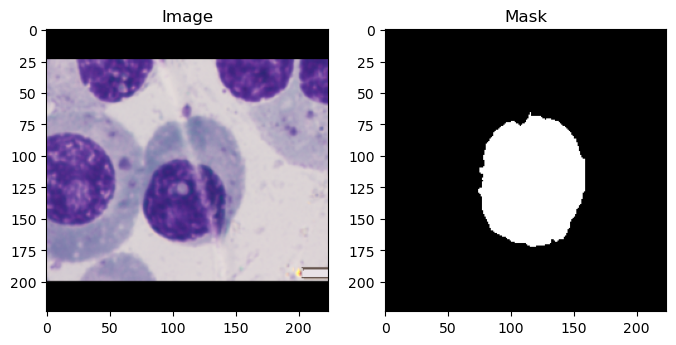

Test


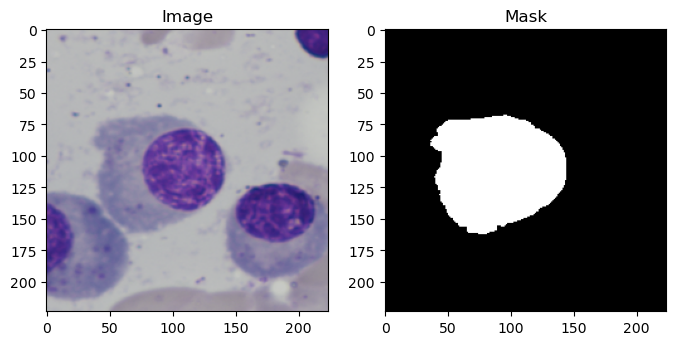

In [47]:
import sys
sys.path.append('..')
from utils import show_sbs
from torch.utils.data import DataLoader, Subset
from torchvision import transforms



# ------------------- params --------------------
INPUT_SIZE = 224
DATA_DIR = "/path/to/datasets/segpc/np"

TR_BATCH_SIZE = 8
TR_DL_SHUFFLE = True
TR_DL_WORKER = 1

VL_BATCH_SIZE = 12
VL_DL_SHUFFLE = False
VL_DL_WORKER = 1

TE_BATCH_SIZE = 12
TE_DL_SHUFFLE = False
TE_DL_WORKER = 1
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


# ----------------- transform ------------------
# transform for image
img_transform = transforms.Compose([
    transforms.ToTensor()
])
# transform for mask
msk_transform = transforms.Compose([
    transforms.ToTensor()
])
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


# ----------------- dataset --------------------
# preparing training dataset
# preparing training dataset
tr_dataset = SegPC2021Dataset(
    mode="tr",
    input_size=INPUT_SIZE,
    force_rebuild=False,
    img_transform=img_transform,
    msk_transform=msk_transform
)
# preparing training dataset
vl_dataset = SegPC2021Dataset(
    mode="vl",
    input_size=INPUT_SIZE,
    force_rebuild=False,
    img_transform=img_transform,
    msk_transform=msk_transform
)
# preparing training dataset
te_dataset = SegPC2021Dataset(
    mode="te",
    input_size=INPUT_SIZE,
    force_rebuild=False,
    img_transform=img_transform,
    msk_transform=msk_transform
)

# prepare train dataloader
tr_loader = DataLoader(
    tr_dataset, 
    batch_size=TR_BATCH_SIZE, 
    shuffle=TR_DL_SHUFFLE, 
    num_workers=TR_DL_WORKER,
    pin_memory=True
)

# prepare validation dataloader
vl_loader = DataLoader(
    vl_dataset, 
    batch_size=VL_BATCH_SIZE, 
    shuffle=VL_DL_SHUFFLE, 
    num_workers=VL_DL_WORKER,
    pin_memory=True
)

# prepare test dataloader
te_loader = DataLoader(
    te_dataset, 
    batch_size=TE_BATCH_SIZE, 
    shuffle=TE_DL_SHUFFLE, 
    num_workers=TE_DL_WORKER,
    pin_memory=True
)

# -------------- test -----------------
# test and visualize the input data
for batch in tr_loader:
    img = batch['image']
    msk = batch['mask']
    print("Training", msk.shape)
    show_sbs(img[0,:-1,:,:], msk[0,0])
    break
    
for batch in vl_loader:
    img = batch['image']
    msk = batch['mask']
    print("Validation")
    show_sbs(img[0,:-1,:,:], msk[0,1])
    break
    
for batch in te_loader:
    img = batch['image']
    msk = batch['mask']
    print("Test")
    show_sbs(img[0,:-1,:,:], msk[0,1])
    break

## Check for .py

In [ ]:
import sys
sys.path.append('.')
from segpc import (
    SegPC2021TrainingDataset,
    SegPC2021ValidationDataset,
    SegPC2021TestDataset
)

In [1]:
import sys
sys.path.append('..')
from utils import show_sbs
from torch.utils.data import DataLoader, Subset
from torchvision import transforms


# ------------------- params --------------------
INPUT_SIZE = 256

TR_BATCH_SIZE = 8
TR_DL_SHUFFLE = True
TR_DL_WORKER = 1

VL_BATCH_SIZE = 12
VL_DL_SHUFFLE = False
VL_DL_WORKER = 1

TE_BATCH_SIZE = 12
TE_DL_SHUFFLE = False
TE_DL_WORKER = 1
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


# ----------------- transform ------------------
# transform for image
img_transform = transforms.Compose([
    transforms.ToTensor()
])
# transform for mask
msk_transform = transforms.Compose([
    transforms.ToTensor()
])
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


# ----------------- dataset --------------------
# preparing training dataset
tr_dataset = SegPC2021TrainingDataset(
    img_transform=img_transform,
    msk_transform=msk_transform
)
# preparing training dataset
vl_dataset = SegPC2021ValidationDataset(
    img_transform=img_transform,
    msk_transform=msk_transform
)
# preparing training dataset
te_dataset = SegPC2021TestDataset(
    img_transform=img_transform,
    msk_transform=msk_transform
)

# prepare train dataloader
tr_loader = DataLoader(
    tr_dataset, 
    batch_size=TR_BATCH_SIZE, 
    shuffle=TR_DL_SHUFFLE, 
    num_workers=TR_DL_WORKER,
    pin_memory=True
)

# prepare validation dataloader
vl_loader = DataLoader(
    vl_dataset, 
    batch_size=VL_BATCH_SIZE, 
    shuffle=VL_DL_SHUFFLE, 
    num_workers=VL_DL_WORKER,
    pin_memory=True
)

# prepare test dataloader
te_loader = DataLoader(
    te_dataset, 
    batch_size=TE_BATCH_SIZE, 
    shuffle=TE_DL_SHUFFLE, 
    num_workers=TE_DL_WORKER,
    pin_memory=True
)

# -------------- test -----------------
# test and visualize the input data
for batch in tr_loader:
    img = batch['image']
    msk = batch['mask']
    print("Training")
    show_sbs(img[0,:-1,:,:], msk[0])
    break
    
for batch in vl_loader:
    img = batch['image']
    msk = batch['mask']
    print("Validation")
    show_sbs(img[0,:-1,:,:], msk[0])
    break
    
for batch in te_loader:
    img = batch['image']
    msk = batch['mask']
    print("Test")
    show_sbs(img[0,:-1,:,:], msk[0])
    break